In this notebook, we will explore Lasso Regression Machine Learning model for the external Ligand set in ethanol dataset.

# Machine Learning for Nickel Catalyzed Borylation in EtOH

In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math as math
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

### Load Preprocessed Ethanol Dataset 

In [2]:
dataset = pd.read_csv("./data/data_EtOH_Final.csv")
dataset.head()

,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,50.731606,50.731606,351.19888,1.840787,-0.055960,A-paPhos,InChI=1S/C20H20NP/c1-21(2)17-13-15-20(16-14-17...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,80.673770,61.935337,479.46484,1.803143,-0.058457,CX-FBu,InChI=1S/C29H39P.BF4/c1-2-3-22-29(27-20-12-10-...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,107.755370,56.694310,386.44120,1.805810,-0.058387,CX-PCy,InChI=1S/C22H30NP/c1-4-11-19(12-5-1)23-18-10-1...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,117.597336,54.091050,618.03375,1.817123,-0.054418,Cy-BippyPhos,InChI=1S/C36H39N4P/c1-6-16-28(17-7-1)34-36(35(...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,111.484024,57.033180,402.37967,1.816461,-0.061351,Cy-JohnPhos,InChI=1S/C24H31P/c1-4-12-20(13-5-1)23-18-10-11...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",80.44


In [3]:
dataset.Ligand.unique().tolist()

['A-paPhos',
 'CX-FBu',
 'CX-PCy',
 'Cy-BippyPhos',
 'Cy-JohnPhos',
 'Cy-PhenCar-Phos',
 'Cy-vBRIDP',
 'Kwong',
 'MePhos',
 'PCy3 HBF4',
 'Ph-DavePhos',
 'Ph-SPhos',
 'Ph-XPhos',
 'PMe3 HBF4',
 'PnBu3 HBF4',
 'P(o-Anis)3',
 'P(p-Anis)3',
 'P(p-F-Ph)3',
 'PPh2Cy',
 'PPh3',
 'PPhtBu2',
 'PXy3',
 'VPhos']

In [4]:
#load external ligand dataset in EtOH
ex_dataset = pd.read_csv("./data/external_ligand_data_EtOH.csv")
ex_dataset.head()

,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,117.552360,56.790530,430.68256,1.797235,-0.062511,Cy-JohnPhos-OMe,InChI=1S/C25H33OP/c1-26-24-18-10-8-16-22(24)23...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",80.58
1,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,124.748184,58.538240,497.10650,1.784157,-0.063670,CPhos,InChI=1S/C28H41N2P/c1-29(2)25-19-13-20-26(30(3...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",67.06
2,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,109.966415,55.457000,415.06253,1.801754,-0.061979,CX-POMeCy,InChI=1S/C23H32NOP/c1-25-22-16-9-8-15-21(22)24...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",78.86
3,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,49.582157,43.828636,151.64550,1.826696,-0.062157,PEt3,"InChI=1S/C6H15P/c1-4-7(5-2)6-3/h4-6H2,1-3H3",InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",8.66
4,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,54.862930,51.901974,330.64270,1.833448,-0.054343,PPh2(o-Anis),InChI=1S/C19H17OP/c1-20-18-14-8-9-15-19(18)21(...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",79.61


In [5]:
ex_dataset.Ligand.unique().tolist()

['Cy-JohnPhos-OMe',
 'CPhos',
 'CX-POMeCy',
 'PEt3',
 'PPh2(o-Anis)',
 'RuPhos',
 'P(p-CF3-Ph)3',
 'CM-Phos',
 'PBn3',
 'CX-PInCy',
 'S-Phos',
 'PPhCy2']

In [6]:
#Training set
ML_data_traintest = dataset
ML_data_traintest2 = ML_data_traintest.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)
print (ML_data_traintest2.shape)
ML_data_traintest2.head()

(779, 157)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960,87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457,6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387,71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418,64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,44.561430,72.197180,0.212085,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351,80.44


In [7]:
X_train=ML_data_traintest2.drop(columns=['Yield'])
Y_train=ML_data_traintest2['Yield']

### Lasso

In [8]:
%%time
steps = [('scaler', StandardScaler()), ('model', Lasso())]
pipeline = Pipeline(steps)
parameters = {'model__alpha': np.logspace(-10, 1, 50)}

lasso_search = GridSearchCV(pipeline, 
                         parameters, 
                         cv = 5, 
                         scoring="neg_mean_squared_error", 
                         verbose=3)

lasso_search.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .............................model__alpha=1e-10; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.71514053541, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.87512216749, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............................model__alpha=1e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.35085450395, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............................model__alpha=1e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78316.04468624858, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............................model__alpha=1e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.92545405032, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............................model__alpha=1e-10; total time=   0.3s
[CV 1/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.71489573774, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.87468550206, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.35051835763, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.2s
[CV 3/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78316.04431912611, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.92513545163, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.2s
[CV 5/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.71448525159, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=2.811768697974225e-10; total time=   0.2s
[CV 2/5] END .............model__alpha=2.811768697974225e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.8739532859, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.349954697, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78316.0437035226, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=2.811768697974225e-10; total time=   0.3s
[CV 4/5] END .............model__alpha=2.811768697974225e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.92460121456, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=2.811768697974225e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.71379693524, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.87272548277, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.34900953124, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78316.04267125855, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.2s
[CV 4/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.92370538852, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.3s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.71264274363, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=7.906043210907701e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.87066666117, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.34742464643, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.906043210907701e-10; total time=   0.2s
[CV 3/5] END .............model__alpha=7.906043210907701e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78316.04094032384, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.92220323754, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=7.906043210907701e-10; total time=   0.2s
[CV 5/5] END .............model__alpha=7.906043210907701e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.71070735694, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.86721436151, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.1s
[CV 2/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.34476705984, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78316.03803783575, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.1s
[CV 4/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.91968438216, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.707462037426, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.2s
[CV 1/5] END .............model__alpha=2.222996482526191e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.86142543213, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.34031073116, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=2.222996482526191e-09; total time=   0.2s
[CV 3/5] END .............model__alpha=2.222996482526191e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78316.03317084805, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.91546068189, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=2.222996482526191e-09; total time=   0.2s
[CV 5/5] END .............model__alpha=2.222996482526191e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.702020177654, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.85171836337, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=3.727593720314938e-09; total time=   0.2s
[CV 2/5] END .............model__alpha=3.727593720314938e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.33283821173, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78316.02500972239, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=3.727593720314938e-09; total time=   0.2s
[CV 4/5] END .............model__alpha=3.727593720314938e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.90837824263, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.69289508718, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=3.727593720314938e-09; total time=   0.1s
[CV 1/5] END .............model__alpha=6.250551925273976e-09; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.8354412316, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.32030804317, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.250551925273976e-09; total time=   0.1s
[CV 3/5] END .............model__alpha=6.250551925273976e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78316.01132487801, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.89650217592, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=6.250551925273976e-09; total time=   0.2s
[CV 5/5] END .............model__alpha=6.250551925273976e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.67759383129, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.80814719916, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.1s
[CV 2/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.29929703924, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78315.9883776782, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.1s
[CV 4/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.87658799949, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.65193617107, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.1s
[CV 1/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.76237966224, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.26406508526, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.2s
[CV 3/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78315.949899053, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.8431952588, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.1s
[CV 5/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.6089125349, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.68563513768, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.1s
[CV 2/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.20498695101, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78315.8853768156, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.2s
[CV 4/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.7872012317, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.53676900847, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.1s
[CV 1/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.55694736133, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85156.10592270007, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.1s
[CV 3/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78315.7771837672, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.69330865792, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.2s
[CV 5/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.41579615153, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73764.34115937157, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=8.286427728546843e-08; total time=   0.2s
[CV 2/5] END .............model__alpha=8.286427728546843e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85155.93980824531, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78315.59576200153, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=8.286427728546843e-08; total time=   0.1s
[CV 4/5] END .............model__alpha=8.286427728546843e-08; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.53586665637, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65199.21294427537, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=8.286427728546843e-08; total time=   0.1s
[CV 1/5] END .............model__alpha=1.389495494373136e-07; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73763.97931871963, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85155.66126133736, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=1.389495494373136e-07; total time=   0.1s
[CV 3/5] END .............model__alpha=1.389495494373136e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78315.29154773291, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78401.27186316656, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=1.389495494373136e-07; total time=   0.2s
[CV 5/5] END .............model__alpha=1.389495494373136e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65198.87279386951, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73763.3725717108, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=2.329951810515372e-07; total time=   0.1s
[CV 2/5] END .............model__alpha=2.329951810515372e-07; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85155.19418268696, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78314.78143045236, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=2.329951810515372e-07; total time=   0.1s
[CV 4/5] END .............model__alpha=2.329951810515372e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78400.8291746672, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65198.302413684076, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=2.329951810515372e-07; total time=   0.2s
[CV 1/5] END .............model__alpha=3.906939937054621e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73762.35515641331, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85154.41096414132, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=3.906939937054621e-07; total time=   0.1s
[CV 3/5] END .............model__alpha=3.906939937054621e-07; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78313.92604681027, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78400.08686351817, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=3.906939937054621e-07; total time=   0.1s
[CV 5/5] END .............model__alpha=3.906939937054621e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65197.345967960864, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73760.64911550918, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.2s
[CV 2/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85153.09762151132, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78312.49170520957, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.1s
[CV 4/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78398.84214159887, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65195.74213047631, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.1s
[CV 1/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73757.78835468352, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85150.89532041542, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.2s
[CV 3/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78310.08653672285, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78396.75497862174, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.2s
[CV 5/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65193.0526567001, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73752.99129384388, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.1s
[CV 2/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85147.20230310311, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78306.053422516, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.1s
[CV 4/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78393.25523297625, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65188.54255845107, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.1s
[CV 1/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73744.9473037239, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85141.00937864349, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.2s
[CV 3/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78299.29042759955, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78387.38696344322, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.1s
[CV 5/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65180.97904302459, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73731.4586692451, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=5.179474679231212e-06; total time=   0.1s
[CV 2/5] END .............model__alpha=5.179474679231212e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85130.6238877676, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78287.94965698851, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=5.179474679231212e-06; total time=   0.1s
[CV 4/5] END .............model__alpha=5.179474679231212e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78377.5474721487, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65168.293951475345, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=5.179474679231212e-06; total time=   0.1s
[CV 1/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73708.83942263552, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85113.20636462345, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.2s
[CV 3/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78268.93206555086, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78361.05017858617, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.2s
[CV 5/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65147.01667394123, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73670.90809956289, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.1s
[CV 2/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85083.9922400167, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78237.04000947, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.1s
[CV 4/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78333.3919648373, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65111.32071457992, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.2s
[CV 1/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73607.29653853273, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85034.98296588613, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.1s
[CV 3/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78183.55413118337, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78287.02825001285, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.1s
[CV 5/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65051.414622466174, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73500.61065686465, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=4.094915062380427e-05; total time=   0.2s
[CV 2/5] END .............model__alpha=4.094915062380427e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84952.74134681883, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78093.84459734183, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=4.094915062380427e-05; total time=   0.2s
[CV 4/5] END .............model__alpha=4.094915062380427e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78209.32525284725, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64950.82152295201, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=4.094915062380427e-05; total time=   0.1s
[CV 1/5] END .............model__alpha=6.866488450042999e-05; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73321.66576625152, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84814.66834291602, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.866488450042999e-05; total time=   0.1s
[CV 3/5] END .............model__alpha=6.866488450042999e-05; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77943.35359153293, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78079.15302197241, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=6.866488450042999e-05; total time=   0.1s
[CV 5/5] END .............model__alpha=6.866488450042999e-05; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64781.78424857011, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73021.48140359769, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=0.00011513953993264481; total time=   0.1s
[CV 2/5] END ............model__alpha=0.00011513953993264481; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84582.68581881009, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77690.85491052327, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=0.00011513953993264481; total time=   0.1s
[CV 4/5] END ............model__alpha=0.00011513953993264481; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77861.24390050884, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64497.36416021963, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=0.00011513953993264481; total time=   0.2s
[CV 1/5] END ............model__alpha=0.00019306977288832496; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72517.83477885165, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84192.4852801785, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=0.00019306977288832496; total time=   0.1s
[CV 3/5] END ............model__alpha=0.00019306977288832496; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77267.10299841803, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77496.93614975749, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=0.00019306977288832496; total time=   0.1s
[CV 5/5] END ............model__alpha=0.00019306977288832496; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64018.067564234545, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71672.54971771852, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=0.00032374575428176466; total time=   0.2s
[CV 2/5] END ............model__alpha=0.00032374575428176466; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83535.00261233034, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76555.7813801172, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=0.00032374575428176466; total time=   0.1s
[CV 4/5] END ............model__alpha=0.00032374575428176466; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76889.24869698881, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63209.8537285927, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=0.00032374575428176466; total time=   0.1s
[CV 1/5] END .............model__alpha=0.0005428675439323859; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70254.18628955029, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82424.43892308259, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.0005428675439323859; total time=   0.1s
[CV 3/5] END .............model__alpha=0.0005428675439323859; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75361.45667947484, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75880.23827209834, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=0.0005428675439323859; total time=   0.1s
[CV 5/5] END .............model__alpha=0.0005428675439323859; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61839.43163894237, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67875.7365914329, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=0.0009102981779915227; total time=   0.2s
[CV 2/5] END .............model__alpha=0.0009102981779915227; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80541.1624059646, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73358.7524299973, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=0.0009102981779915227; total time=   0.1s
[CV 4/5] END .............model__alpha=0.0009102981779915227; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74217.35895095917, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59508.19829415553, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=0.0009102981779915227; total time=   0.2s
[CV 1/5] END .............model__alpha=0.0015264179671752333; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64002.02568733315, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77330.69695189121, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.0015264179671752333; total time=   0.1s
[CV 3/5] END .............model__alpha=0.0015264179671752333; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70002.83571977945, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71587.93990669487, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=0.0015264179671752333; total time=   0.2s
[CV 5/5] END .............model__alpha=0.0015264179671752333; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55519.696607869686, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57820.78228664629, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=0.0025595479226995332; total time=   0.1s
[CV 2/5] END .............model__alpha=0.0025595479226995332; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72322.67141772271, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64404.96033280648, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=0.0025595479226995332; total time=   0.1s
[CV 4/5] END .............model__alpha=0.0025595479226995332; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67295.11416296347, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48741.02599981504, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=0.0025595479226995332; total time=   0.1s
[CV 1/5] END ..............model__alpha=0.004291934260128779; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50429.30880554143, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64442.33869222267, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..............model__alpha=0.004291934260128779; total time=   0.1s
[CV 3/5] END ..............model__alpha=0.004291934260128779; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55119.78001729772, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59873.32965171077, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..............model__alpha=0.004291934260128779; total time=   0.1s
[CV 5/5] END ..............model__alpha=0.004291934260128779; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37483.47888995145, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41115.37658483827, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.007196856730011514; total time=   0.1s
[CV 2/5] END ..............model__alpha=0.007196856730011514; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51556.332319302266, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40368.04391186103, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.007196856730011514; total time=   0.1s
[CV 4/5] END ..............model__alpha=0.007196856730011514; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48604.11808362191, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20094.267544392336, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=0.007196856730011514; total time=   0.2s
[CV 1/5] END ..............model__alpha=0.012067926406393264; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30174.54863163361, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41724.08217675742, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..............model__alpha=0.012067926406393264; total time=   0.2s
[CV 3/5] END ..............model__alpha=0.012067926406393264; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19241.34902978946, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34006.771779866525, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..............model__alpha=0.012067926406393264; total time=   0.1s
[CV 5/5] END ..............model__alpha=0.012067926406393264; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5376.780967358223, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16330.977569751354, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.020235896477251554; total time=   0.1s
[CV 2/5] END ..............model__alpha=0.020235896477251554; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30762.337504123716, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3716.773170968343, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.020235896477251554; total time=   0.1s
[CV 4/5] END ..............model__alpha=0.020235896477251554; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12388.148132372517, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1533.4013241182838, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=0.020235896477251554; total time=   0.1s
[CV 1/5] END ................model__alpha=0.0339322177189533; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6267.670826530462, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2280.7878184840956, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ................model__alpha=0.0339322177189533; total time=   0.1s
[CV 3/5] END ................model__alpha=0.0339322177189533; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1407.829154860985, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7015.726481239515, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ................model__alpha=0.0339322177189533; total time=   0.1s
[CV 5/5] END ................model__alpha=0.0339322177189533; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.0534027893154, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766.0972751805966, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ...............model__alpha=0.05689866029018305; total time=   0.1s
[CV 2/5] END ...............model__alpha=0.05689866029018305; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.60830317719956, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597.3778496702143, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ...............model__alpha=0.05689866029018305; total time=   0.1s
[CV 4/5] END ...............model__alpha=0.05689866029018305; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.60843845075578, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.781461172126, tolerance: 39.78987416850729
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.05689866029018305; total time=   0.1s
[CV 1/5] END ...............model__alpha=0.09540954763499924; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.58288963587256, tolerance: 44.57595086941136
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393.3017109911889, tolerance: 46.82437454234459
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ...............model__alpha=0.09540954763499924; total time=   0.1s
[CV 3/5] END ...............model__alpha=0.09540954763499924; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791.6905354444461, tolerance: 45.05783419193453
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232.97453530548955, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.09540954763499924; total time=   0.1s
[CV 5/5] END ...............model__alpha=0.09540954763499924; total time=   0.1s
[CV 1/5] END ...............model__alpha=0.15998587196060574; total time=   0.1s
[CV 2/5] END ...............model__alpha=0.15998587196060574; total time=   0.1s
[CV 3/5] END ...............model__alpha=0.15998587196060574; total time=   0.1s
[CV 4/5] END ...............model__alpha=0.15998587196060574; total time=   0.1s
[CV 5/5] END ...............model__alpha=0.15998587196060574; total time=   0.1s
[CV 1/5] END ...............model__alpha=0.26826957952797276; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.278338671894744, tolerance: 42.123115404364526
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ...............model__alpha=0.26826957952797276; total time=   0.0s
[CV 3/5] END ...............model__alpha=0.26826957952797276; total time=   0.1s
[CV 4/5] END ...............model__alpha=0.26826957952797276; total time=   0.1s
[CV 5/5] END ...............model__alpha=0.26826957952797276; total time=   0.0s
[CV 1/5] END ................model__alpha=0.4498432668969453; total time=   0.1s
[CV 2/5] END ................model__alpha=0.4498432668969453; total time=   0.0s
[CV 3/5] END ................model__alpha=0.4498432668969453; total time=   0.1s
[CV 4/5] END ................model__alpha=0.4498432668969453; total time=   0.1s
[CV 5/5] END ................model__alpha=0.4498432668969453; total time=   0.0s
[CV 1/5] END ................model__alpha=0.7543120063354607; total time=   0.1s
[CV 2/5] END ................model__alpha=0.7543120063354607; total time=   0.0s
[CV 3/5] END ................model__alpha=0.7543120063354607; total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07...
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error', verbose=3)

In [9]:
lasso_search.best_params_

{'model__alpha': 0.26826957952797276}

In [10]:
lasso_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(alpha=0.26826957952797276))])

### External Ligand set Evaluation

In [11]:
ext_y=ex_dataset['Yield']
ext_X=ex_dataset.iloc[:, ex_dataset.columns.isin(X_train.columns)]

Y_Pred = lasso_search.best_estimator_.predict(ext_X)

In [12]:
mse = mean_squared_error(ext_y, Y_Pred)
print(math.sqrt(mse))

20.967009468034657


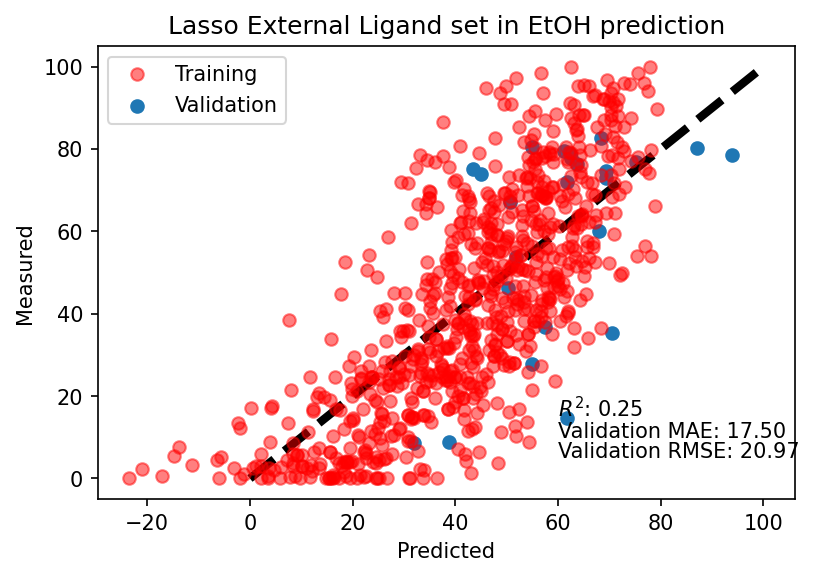

In [13]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(Y_Pred,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(lasso_search.best_estimator_.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(60,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,Y_Pred)))
ax.text(60,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(Y_Pred,ext_y)))
ax.text(60,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_Pred,ext_y))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('Lasso External Ligand set in EtOH prediction')
plt.legend()
plt.show()

<AxesSubplot:ylabel='feature'>

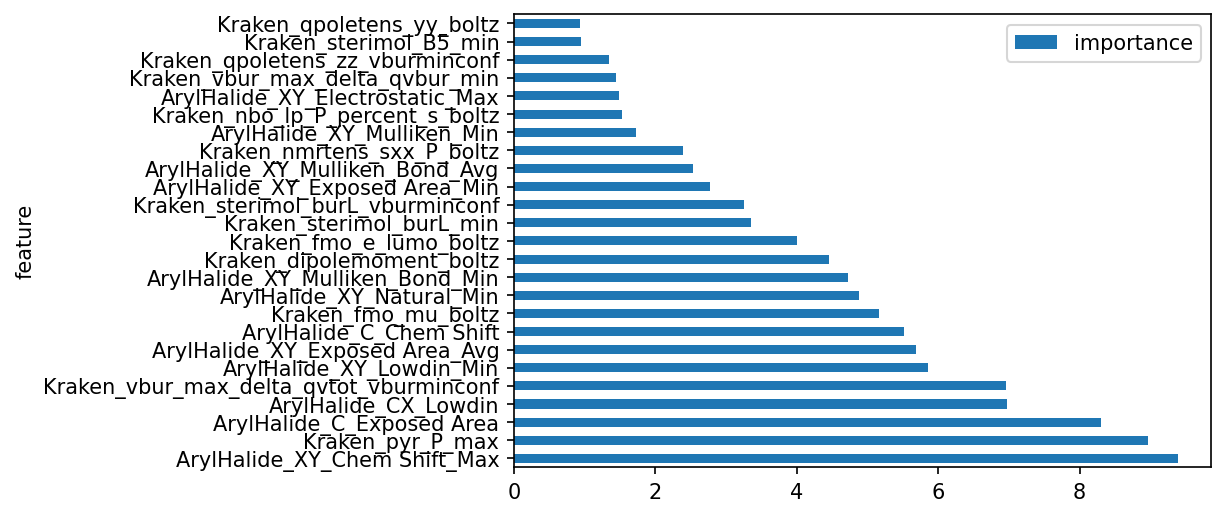

In [14]:
#Top features in Lasso
coefs=lasso_search.best_estimator_.named_steps['model'].coef_
importance=np.abs(coefs)
features=X_train.columns
df=pd.DataFrame(zip(features,importance))
df2 = df.sort_values(by=[1], ascending=False).head(25)
df2.columns = ['feature', 'importance']
df2.set_index('feature',inplace=True)
df2.plot(kind='barh')

In [15]:
results=ex_dataset[['Electrophile','Ligand','Yield']]
results.reset_index(drop=True, inplace=True)
results['Pred_Yield']=Y_Pred
results.to_csv("results/Lasso_EtOH_Ligand_prediction.csv",index=False)

<ipython-input-15-46571998fb2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Pred_Yield']=Y_Pred


In [16]:
results

,Electrophile,Ligand,Yield,Pred_Yield
0,5-Bromobenzofuran,Cy-JohnPhos-OMe,80.58,54.896585
1,5-Bromobenzofuran,CPhos,67.06,50.605824
2,5-Bromobenzofuran,CX-POMeCy,78.86,62.405135
3,5-Bromobenzofuran,PEt3,8.66,31.932956
4,5-Bromobenzofuran,PPh2(o-Anis),79.61,61.194855
5,5-Bromobenzofuran,RuPhos,75.21,43.482815
6,5-Bromobenzofuran,P(p-CF3-Ph)3,80.15,86.995710
7,5-Bromobenzofuran,CM-Phos,82.63,68.366001
8,5-Bromobenzofuran,PBn3,27.75,54.858958
9,5-Bromobenzofuran,CX-PInCy,77.80,62.557478


In [17]:
%load_ext watermark

In [18]:
%watermark --iversions

pandas    : 1.2.0
sklearn   : 0.0
matplotlib: 3.3.3
numpy     : 1.19.2

